 # Data Exploration

Now, it's time to start practicing what we have learned on real data.

In the tutorials, that are spead out over the next couple of days, we will work with a dataset from a Kaggle competition: [House Prices: Advanced Regression Techniques.](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) It's a well-known starting point for machine learning.

### Prediction of House Prices: Data Exploration
As usual, let's start with the import of the right packages:

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

- Load the data into a Pandas dataframe called df_train. It can be found [here](https://drive.google.com/file/d/1rca0X0lIPey2xw60EBV6_DVJkmWp4afi/view) and display the first five rows of the data.

Next, we check how many variables and observations we're dealing with:

In [20]:
df_train = pd.read_csv('train.csv')

In [21]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Next, we check how many variables and observations we're dealing with:

In [22]:
print(df_train.shape)

(1460, 81)


Now we check the column names and their data types. We can do everything using one command we already know:

In [23]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

We can check if we have some duplicate ids in our data and remove them:

In [24]:
#check for dupes for Id
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)
#drop id col
df_train.drop(['Id'],axis =1,inplace=True)

0


We see that there are no duplicates, which is good, so we can continue.

### Exploring the Target Variable

The goal of this competition was to predict the price of a house. These values are stored in the variable `SalePrice`.

Let's check the descriptive statistics and the histogram:

C:\Users\engwb\anaconda3\envs\lhl-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

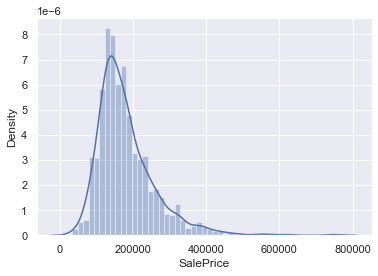

In [25]:
# descriptive statistics
df_train['SalePrice'].describe()
# histogram
sns.distplot(df_train['SalePrice'])

>In the graph above we can observe the following things: - It slightly deviates from a normal distribution. - It's skewed. - It has some outliers (i.e. really huge prices).

### Relationship Between the Target Variable and Predictors
Firstly, let's start with some common sense (or domain knowledge):

- Do we think about this variable when we are buying a house? (e.g. when we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
- If so, how important would this variable be? (e.g. what is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
- Is this information already described in any other variable? (e.g. if 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

We can print a list of all columns:

In [26]:
sorted(list(df_train.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

Let's go through the list above using the documentation and think about what could be useful.

We've done the exercise as well and came up with the following variables:

- OverallQual - a tricky variable, an interesting exercise would be to predict 'OverallQual' using all the other variables available
- YearBuilt
- Neighborhood
- TotalBsmtSF
- GrLivArea

>Now, we are going to check the relationship of these variables with the target variable SalePrice. You can continue with our list or feel free to replicate the steps with your own list.

### Numerical Variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

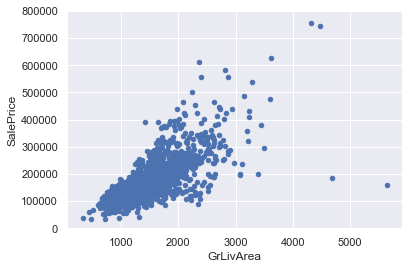

In [27]:
#scatter plot grlivarea vs. SalePrice
var = 'GrLivArea'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

We can see a linear relationship in the picture above.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

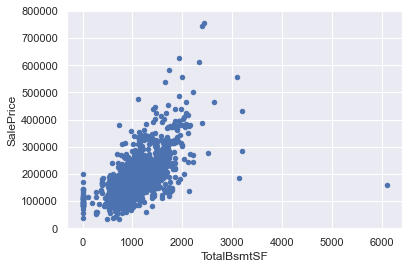

In [28]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

Here, we can see a quadratic relationship.

### Categorical Variables

(-0.5, 9.5, 0.0, 800000.0)

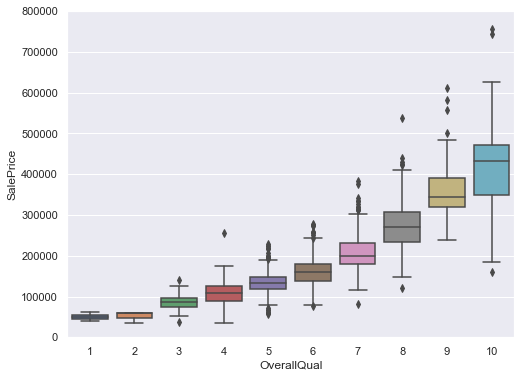

In [30]:
# overallqual
var = 'OverallQual'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

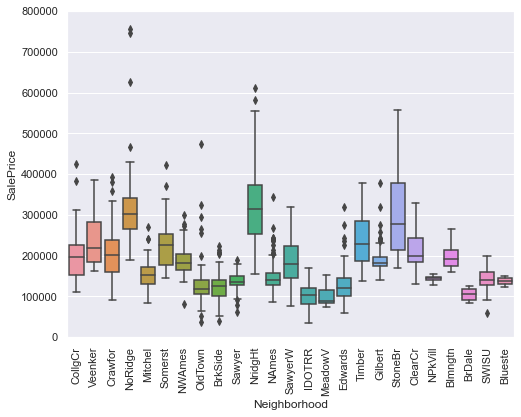

In [31]:
# Neighborhood
var = 'Neighborhood'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

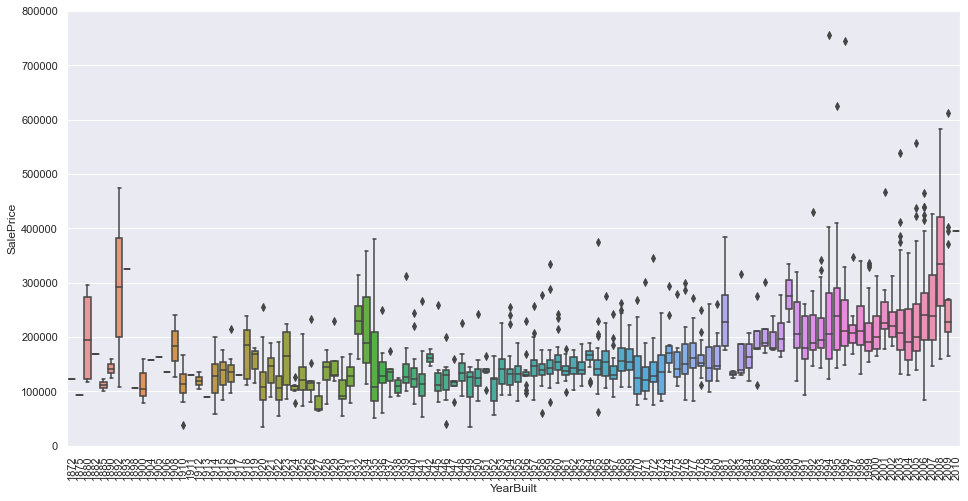

In [32]:
# YearBuilt
var = 'YearBuilt'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

### Multivariate Analysis
Let's look at a correlation matrix between numeric attributes:

<AxesSubplot:>

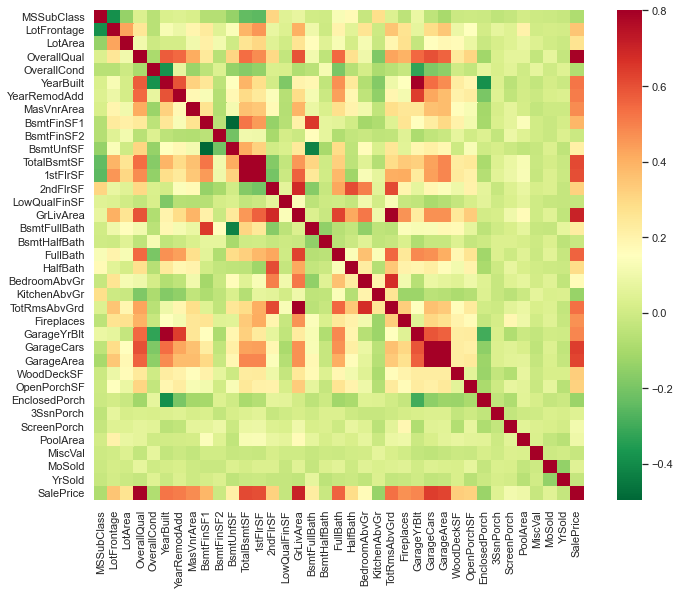

In [33]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

To make it more readable we can plot only those variables that correlate with the target variable more than `0.5`:

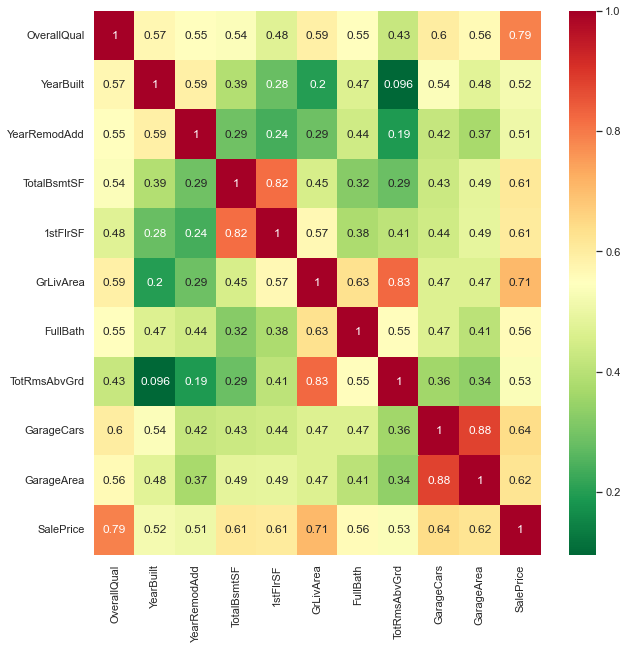

In [34]:
# most correlated features with SalePrice
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

These are the variables most correlated with SalePrice. Our thoughts on this:

- *'OverallQual'*, *'GrLivArea'* and *'TotalBsmtSF'* are strongly correlated with **'SalePrice'**. Check!
- *'GarageCars'* and *'GarageArea'* are also among the most strongly correlated variables. The number of cars that fit into a garage is a consequence of the garage area. *'GarageCars'* and *'GarageArea'* are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep *'GarageCars'* since its correlation with **'SalePrice'** is higher).
- *'TotalBsmtSF'* and *'1stFloor'* also seem to be twin brothers. We can keep *'TotalBsmtSF'* just to be able to say that our first guess was right :).
- *'FullBath'*?? Really?
- *'TotRmsAbvGrd'* and *'GrLivArea'* – twin brothers again.
- *'YearBuilt'*: It seems that *'YearBuilt'* is slightly correlated with **'SalePrice'**. - Therefore, we could also look at the problem as time-series analysis but we will have enough time for that later in the course.